You have just been hired by a Digital Marketing Agency as Data Scientist. They have historical data on
the amount of the money they invested on TV, Newspapers and Radio ads, and the corresponding sales
they made. Consider the dataset provided through this link. Now, they wish to do it in a more informative
way and would like you to fit a linear regression model that will predict their sales based on all the different
ads segments above mentioned. Provide the codes for each of the following questions.


In [1]:
import pandas as pd
import numpy as np

/home/student/.local/lib/python3.9/site-packages/pandas/core/arrays/masked.py:59: UserWarning: Pandas requires version '1.3.2' or newer of 'bottleneck' (version '1.2.1' currently installed).
  from pandas.core import (


In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/rock-feller/Datasets_for_Education/main/data_01/Advertising.csv')

In [3]:
del df['Unnamed: 0']

In [4]:
#df

In [5]:
df['ones']=np.ones(200)

df1=df[['ones','TV','Radio','Newspaper','Sales']]
df1

,ones,TV,Radio,Newspaper,Sales
0,1.0,230.1,37.8,69.2,22.1
1,1.0,44.5,39.3,45.1,10.4
2,1.0,17.2,45.9,69.3,9.3
3,1.0,151.5,41.3,58.5,18.5
4,1.0,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,1.0,38.2,3.7,13.8,7.6
196,1.0,94.2,4.9,8.1,9.7
197,1.0,177.0,9.3,6.4,12.8
198,1.0,283.6,42.0,66.2,25.5


In [6]:
means=df1.mean()
sds=df1.std()

df_scaled=(df1-means)/sds

df_scaled['ones']=np.ones(200)

df_scaled

,ones,TV,Radio,Newspaper,Sales
0,1.0,0.967425,0.979066,1.774493,1.548168
1,1.0,-1.194379,1.080097,0.667903,-0.694304
2,1.0,-1.512360,1.524637,1.779084,-0.905135
3,1.0,0.051919,1.214806,1.283185,0.858177
4,1.0,0.393196,-0.839507,1.278593,-0.215143
...,...,...,...,...,...
195,1.0,-1.267759,-1.317724,-0.769287,-1.230964
196,1.0,-0.615491,-1.236899,-1.031011,-0.828469
197,1.0,0.348934,-0.940539,-1.109069,-0.234310
198,1.0,1.590574,1.261955,1.636743,2.199827


In [7]:
df_scaled.describe()

,ones,TV,Radio,Newspaper,Sales
count,200.0,2.000000e+02,2.000000e+02,2.000000e+02,2.000000e+02
mean,1.0,1.287859e-16,-4.263256e-16,2.309264e-16,-1.865175e-16
std,0.0,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,1.0,-1.704546e+00,-1.566936e+00,-1.389161e+00,-2.380949e+00
25%,1.0,-8.464055e-01,-8.950745e-01,-8.174990e-01,-6.990954e-01
50%,1.0,3.153601e-02,-2.451705e-02,-2.205833e-01,-2.151431e-01
75%,1.0,8.360974e-01,8.931886e-01,6.679027e-01,6.473461e-01
max,1.0,1.739664e+00,1.773849e+00,3.831556e+00,2.487323e+00


In [8]:
df_scaled.describe()

,ones,TV,Radio,Newspaper,Sales
count,200.0,2.000000e+02,2.000000e+02,2.000000e+02,2.000000e+02
mean,1.0,1.287859e-16,-4.263256e-16,2.309264e-16,-1.865175e-16
std,0.0,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,1.0,-1.704546e+00,-1.566936e+00,-1.389161e+00,-2.380949e+00
25%,1.0,-8.464055e-01,-8.950745e-01,-8.174990e-01,-6.990954e-01
50%,1.0,3.153601e-02,-2.451705e-02,-2.205833e-01,-2.151431e-01
75%,1.0,8.360974e-01,8.931886e-01,6.679027e-01,6.473461e-01
max,1.0,1.739664e+00,1.773849e+00,3.831556e+00,2.487323e+00


We can see the mean is ~ 0 and standard diviation 1 so the distribution here is normal

In [9]:
np.linalg.matrix_rank(df_scaled)

5

In [10]:
np.linalg.matrix_rank(df_scaled)

5

we have a full rank so the matrix features are independent

###  1. Divide your data into training and test sets. Allocate 20% for the test set.

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
from sklearn.model_selection import train_test_split
y=df_scaled['Sales']
X=df_scaled.drop('Sales',axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0,test_size=0.2)

In [13]:
 print('The sizes of the 20% test set are \n X_train:', X_train.shape, '\n X_test:', X_test.shape, '\n y_train:',
     y_train.shape, '\n y_test', y_test.shape)

The sizes of the 20% test set are 
 X_train: (160, 4) 
 X_test: (40, 4) 
 y_train: (160,) 
 y_test (40,)


###  2. Run a correlation matrix between the features. What do you observe?

<function matplotlib.pyplot.show(close=None, block=None)>

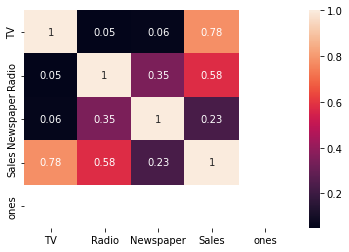

In [14]:
matrix=df.corr().round(2)
sns.heatmap(matrix,annot=True)
plt.show

This correlation matrix share a strong correlation between TV and Sales and it is quite small  on newspaper.

The features are independent, we can see that the are not strong corralation between them

We see in this symmetric matrix that the we have more sales on TV and radio.

### 3. Could you fit a linear regression model through the normal equations? If yes, report your test accuracy using the MSE.

we have 
$$
\mathbf Y=\mathbf X_{train}\beta
$$
and 
$$
\hat \beta =(\mathbf X_{train}^T \mathbf X_{train})^{-1}\mathbf X_{train}^T \mathbf Y
$$


In [15]:
#X_train

In [16]:
a=np.dot(X_train.T,X_train)##or np.matmul(x_train.T,X_train)
b=np.linalg.inv(a)
c=np.dot(X_train.T,y_train)
beta=np.dot(b,c)
beta
#c=np.matmul()

array([ 0.00277165,  0.7336385 ,  0.55915252, -0.01161034])

In [17]:
## We compute the sales:
X=[]
ones=list(X_train['ones'])
TV=list(X_train['TV'])
Radio=list(X_train['Radio'])
Newspaper=list(X_train['Newspaper'])
for i in range(len(X_train)):
    Sales=beta[0]*ones[i] +(beta[1]*TV[i] +beta[2]*Radio[i] + beta[3]*Newspaper[i])
    X.append(Sales)
#print(X)
     


In [18]:
X_=np.array(X)
X_

array([-0.37952116, -0.91912649,  0.20426929,  0.4475899 ,  0.5851335 ,
       -0.1257088 , -1.96155386, -0.37103893,  0.30801463, -1.02344268,
       -0.65367988,  1.02442544,  0.84136019,  0.24556483, -0.77094575,
       -1.116456  ,  1.4320693 ,  0.02574854,  0.43980178, -1.01500214,
        0.23887379, -0.29640412, -0.05771523,  0.03503093,  0.82525014,
        0.97688949,  1.20738991,  0.66553277, -0.89603297, -0.4344418 ,
        1.11883436, -0.7863995 ,  1.28180276,  1.73250876, -0.75490175,
        0.59747683,  1.07899776,  0.84500878,  0.55483379,  0.83451276,
        0.5905639 , -0.99328052, -0.78165307, -1.65518246, -2.00023955,
        0.50045824, -0.27490471,  0.79292293, -0.43100298, -0.25426457,
       -0.04332164, -1.34322764,  0.50316211, -0.80986999, -1.12842083,
        0.32483526,  2.07191911, -0.60889037,  1.36648298, -0.03350595,
       -0.64800837, -1.06489325, -0.30796952,  1.2393561 , -0.67439808,
        0.09460313,  0.44372777,  0.60317643, -0.16096108,  0.63

In [19]:
from sklearn import metrics
#test accuracy using MSE
#MSE = metrics.mean_squared_error(y_test,X_)
k=X_-X_.mean()
MSE=(1/len(X_train))*(sum(k**2))
print(MSE)

0.8593419037721722


### 4. Do the same using the least squares method, using the Stochaastic Gradient Descent rule and report your test accuracy using MSE.

In [20]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDRegressor
import numpy as np

In [21]:
#Creating Stochastic Gradient Descent for fitting the least squares
rng = np.random.RandomState(0)
sgd= make_pipeline(StandardScaler(),SGDRegressor())
sgd.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('sgdregressor', SGDRegressor())])

In [22]:
#Predicting stochastic gradient descent
y_predict = sgd.predict(X_test)
y_predict

array([-0.75590042, -1.24047414, -1.31043985,  1.90059563, -0.36316307,
       -1.39791277, -0.2048574 ,  0.19278585, -0.58415992,  0.4207055 ,
        1.67858724, -0.91788339, -0.67845357,  0.25640819, -0.4682715 ,
       -0.3640177 ,  0.864608  , -0.64010067,  0.35348539,  0.59996345,
        1.91775951, -0.8402676 ,  0.21077707, -0.30081938, -1.55884803,
        0.20609665, -0.32969905,  1.27789786, -0.11726842, -0.92528931,
       -0.13891304,  1.40138294,  0.78601453,  1.32908645, -1.37857327,
       -1.4824845 , -1.13425865, -0.15469886,  0.11791467, -1.46680707])

In [23]:
#Accuracy measure using MSE
MSE = metrics.mean_squared_error(y_test, y_predict)
print(MSE)

0.1613608904247253


Then the means square error is 0.16